https://www.analyticsvidhya.com/blog/2021/02/introduction-to-exploratory-data-analysis-eda/

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re, nltk
import string


In [2]:
df = pd.read_csv('twcs.csv')

In [3]:
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [4]:
df.shape

(2811774, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     object 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB


In [6]:
df.describe()

,tweet_id,in_response_to_tweet_id
count,2.811774e+06,2.017439e+06
mean,1.504565e+06,1.463141e+06
std,8.616450e+05,8.665730e+05
min,1.000000e+00,1.000000e+00
25%,7.601652e+05,7.155105e+05
50%,1.507772e+06,1.439805e+06
75%,2.253296e+06,2.220646e+06
max,2.987950e+06,2.987950e+06


In [7]:
df.isnull().sum()

tweet_id                         0
author_id                        0
inbound                          0
created_at                       0
text                             0
response_tweet_id          1040629
in_response_to_tweet_id     794335
dtype: int64

In [8]:
# drop the row that has missing value
#ndf = df.dropna()

In [9]:
#ndf.isnull().sum()

In [10]:
#check duplicate values
dval = df.duplicated()
print(dval.sum())

0


In [11]:
df['inbound'].value_counts()

True     1537843
False    1273931
Name: inbound, dtype: int64

<AxesSubplot:>

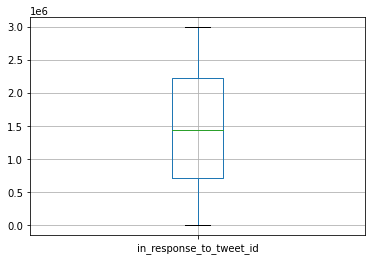

In [12]:
df.boxplot(column = ['in_response_to_tweet_id'])

In [13]:
#top 10 users with the most tweets #visualization is better
top_users=df['author_id'].value_counts()[:10]

In [14]:
top_users

AmazonHelp         169840
AppleSupport       106860
Uber_Support        56270
SpotifyCares        43265
Delta               42253
Tesco               38573
AmericanAir         36764
TMobileHelp         34317
comcastcares        33031
British_Airways     29361
Name: author_id, dtype: int64

In [15]:
tu = top_users.reset_index(level=0)
tu

,index,author_id
0,AmazonHelp,169840
1,AppleSupport,106860
2,Uber_Support,56270
3,SpotifyCares,43265
4,Delta,42253
5,Tesco,38573
6,AmericanAir,36764
7,TMobileHelp,34317
8,comcastcares,33031
9,British_Airways,29361


Text(0, 0.5, 'Number of Tweets')

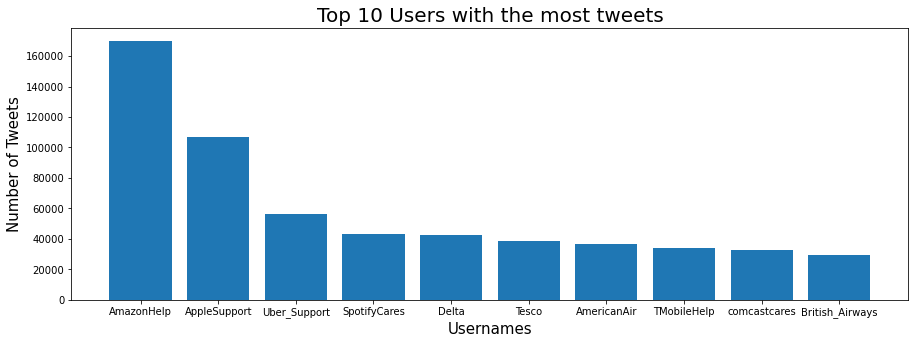

In [16]:
fig = plt.figure(figsize = (15, 5))
plt.bar(tu['index'],tu['author_id'])
plt.title("Top 10 Users with the most tweets", fontsize = 20)
plt.xlabel("Usernames", fontsize = 15)
plt.ylabel("Number of Tweets", fontsize = 15)

Pie chart reference
http://www.learningaboutelectronics.com/Articles/How-to-create-a-pie-chart-in-matplotlib-with-Python.php
https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/

10/17/2022

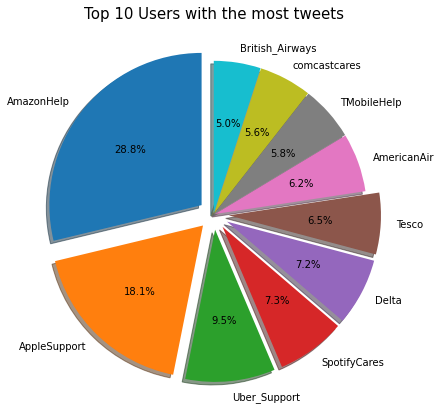

In [17]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.pie(tu['author_id'], labels = tu['index'],startangle=90, autopct='%1.1f%%',shadow=True,explode=(0.1, 0.1, 0.1, 0.1,0.1,0.1,0.01,0.01,0.01,0.01,))
ax.set_title("Top 10 Users with the most tweets", fontsize = 15)

plt.show()

In [18]:
#top inbound users
ndf = df[df.inbound != 0]
ndf

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0
...,...,...,...,...,...,...,...
2811765,2987944,823868,True,Wed Nov 22 07:43:36 +0000 2017,@AirAsiaSupport \n\nI am unable to do web chec...,2987943,NaN
2811768,2987946,524544,True,Wed Nov 22 08:25:48 +0000 2017,@VirginTrains Hope you are well? Does the 9.30...,2987945,NaN
2811770,2987948,823869,True,Wed Nov 22 08:35:16 +0000 2017,@115714 wtf!? I’ve been having really shitty s...,2987947,NaN
2811771,2812240,121673,True,Thu Nov 23 04:13:07 +0000 2017,@143549 @sprintcare You have to go to https://...,NaN,2812239.0


In [19]:
#non-inbound users
odf = df[df.inbound == 0]
odf

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0
...,...,...,...,...,...,...,...
2811764,2987943,AirAsiaSupport,False,Wed Nov 22 07:54:57 +0000 2017,"@823868 Sorry but kindly try to clear browser,...",NaN,2987944.0
2811766,139628,ArgosHelpers,False,Wed Nov 22 08:03:26 +0000 2017,@134664 Can you Dm us your order number and we...,NaN,139627.0
2811767,2987945,VirginTrains,False,Wed Nov 22 08:27:34 +0000 2017,@524544 That's a Peak service. The 09:56 is th...,NaN,2987946.0
2811769,2987947,sprintcare,False,Wed Nov 22 08:43:51 +0000 2017,"@823869 Hey, we'd be happy to look into this f...",NaN,2987948.0


In [20]:
top_inusers=ndf['author_id'].value_counts()[:10]
top_inusers

115911    1286
120576    1010
115913     563
116230     454
169172     448
117627     406
115888     332
116136     295
116421     276
115722     252
Name: author_id, dtype: int64

In [21]:
intu = top_inusers.reset_index(level=0)
intu

,index,author_id
0,115911,1286
1,120576,1010
2,115913,563
3,116230,454
4,169172,448
5,117627,406
6,115888,332
7,116136,295
8,116421,276
9,115722,252


Text(0, 0.5, 'Number of Tweets')

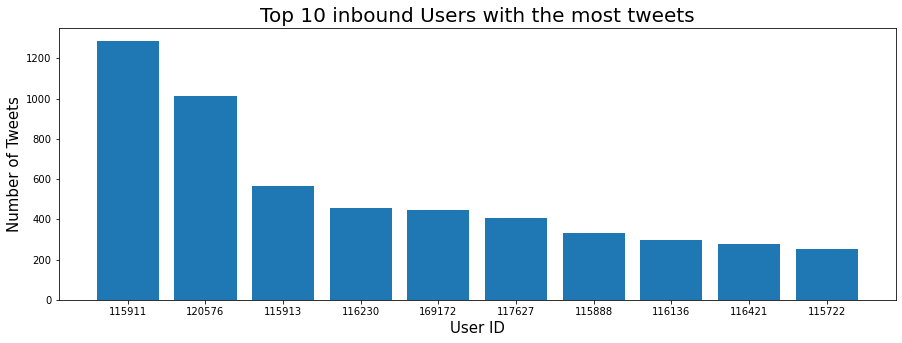

In [22]:
fig = plt.figure(figsize = (15, 5))
plt.bar(intu['index'],intu['author_id'])
plt.title("Top 10 inbound Users with the most tweets", fontsize = 20)
plt.xlabel("User ID", fontsize = 15)
plt.ylabel("Number of Tweets", fontsize = 15)

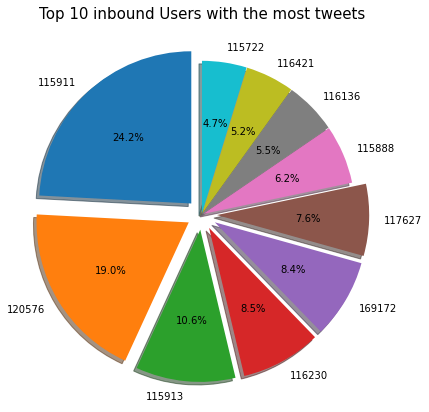

In [23]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.pie(intu['author_id'], labels = intu['index'],startangle=90, autopct='%1.1f%%',shadow=True,explode=(0.1, 0.1, 0.1, 0.1,0.1,0.1,0.01,0.01,0.01,0.01,))
ax.set_title("Top 10 inbound Users with the most tweets", fontsize = 15)

plt.show()

In [24]:
#top authors by response
#the difference of response and in_response
rdf = df[df['response_tweet_id'].notnull()]

rcount = rdf['response_tweet_id'].apply(lambda x: len(x.split(',')))
rcount

0          1
2          1
3          1
4          1
5          2
          ..
2811763    1
2811765    1
2811768    1
2811770    1
2811773    2
Name: response_tweet_id, Length: 1771145, dtype: int64

In [25]:
rcdf = pd.DataFrame({'author_id': df['author_id'],
     'response_tweet_id': df['response_tweet_id'],
     'response_count': rcount
    })
rcdf[:20]

,author_id,response_tweet_id,response_count
0,sprintcare,2,1.0
1,115712,NaN,NaN
2,115712,1,1.0
3,sprintcare,3,1.0
4,115712,4,1.0
5,sprintcare,"5,7",2.0
6,115712,"9,6,10",3.0
7,sprintcare,NaN,NaN
8,115713,"11,13,14",3.0
9,sprintcare,12,1.0


In [26]:
rcdf.sort_values(by="response_count", ascending=False)

,author_id,response_tweet_id,response_count
1233779,AldiUK,"1360224,1360225,1360226,1360227,1360228,136022...",1755.0
355153,McDonalds,"404993,404994,404995,404996,404997,404998,4049...",1546.0
68711,115765,"87815,87816,87817,87818,87819,87820,87821,8782...",1090.0
312783,McDonalds,"357635,357636,357637,357638,357639,357640,3576...",1045.0
555506,ATVIAssist,"625012,625013,625014,625015,625016,625017,6250...",844.0
...,...,...,...
2811766,ArgosHelpers,NaN,NaN
2811767,VirginTrains,NaN,NaN
2811769,sprintcare,NaN,NaN
2811771,121673,NaN,NaN


In [27]:
rcdf_10 = rcdf.sort_values(by="response_count", ascending=False)[:10]
rcdf_10

,author_id,response_tweet_id,response_count
1233779,AldiUK,"1360224,1360225,1360226,1360227,1360228,136022...",1755.0
355153,McDonalds,"404993,404994,404995,404996,404997,404998,4049...",1546.0
68711,115765,"87815,87816,87817,87818,87819,87820,87821,8782...",1090.0
312783,McDonalds,"357635,357636,357637,357638,357639,357640,3576...",1045.0
555506,ATVIAssist,"625012,625013,625014,625015,625016,625017,6250...",844.0
1838143,AldiUK,"1994034,1994035,1994036,1994037,1994038,199403...",842.0
546820,VirginTrains,"614087,614088,614089,614090,614091,614092,6140...",784.0
1028802,AldiUK,"1138842,1138843,1138844,1138845,1138846,113884...",776.0
951842,AldiUK,"1055634,1055635,1055636,1055637,1055638,105563...",767.0
65401,ATVIAssist,"82437,82438,82439,82440,82441,82442,82443,8244...",737.0


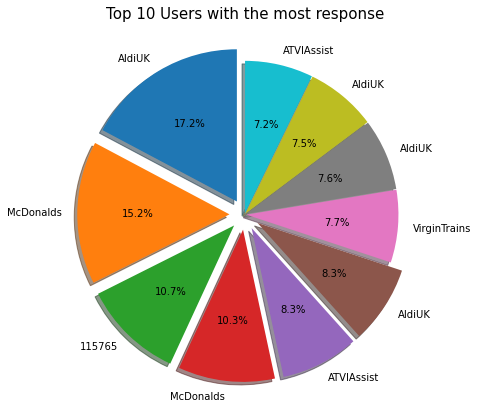

In [28]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.pie(rcdf_10['response_count'], labels = rcdf_10['author_id'],startangle=90, autopct='%1.1f%%',shadow=True,explode=(0.1, 0.1, 0.1, 0.1,0.1,0.1,0.01,0.01,0.01,0.01,))
ax.set_title("Top 10 Users with the most response", fontsize = 15)

plt.show()

In [29]:
#Top inbound response
irdf = ndf[ndf['response_tweet_id'].notnull()]

ircount = irdf['response_tweet_id'].apply(lambda x: len(x.split(',')))
ircdf = pd.DataFrame({'author_id': ndf['author_id'],
     'response_tweet_id': ndf['response_tweet_id'],
     'response_count': ircount
    })
ircdf_10 = ircdf.sort_values(by="response_count", ascending=False)[:10]
ircdf_10

,author_id,response_tweet_id,response_count
68711,115765,"87815,87816,87817,87818,87819,87820,87821,8782...",1090.0
417396,160942,"475277,475278,475279,475280,475281,475282,4752...",487.0
960956,123633,"1066161,1066162,1066163,1066164,1066165,106616...",454.0
2410685,731148,"2579017,2579018,2579019,2579020,2579021,257902...",391.0
2387940,725696,"2555639,2555640,2555641,2555642,2555643,255564...",354.0
1390309,330486,"1530560,1530561,1530562,1530563,1530564,153056...",354.0
1933724,617402,"2088140,2088141,2088142,2088143,2088144,208814...",342.0
1739306,564593,"1893593,1893594,1893595,1893596,1893597,189359...",333.0
61032,133110,"76514,76515,76516,76517,76518,76519,76520,7652...",320.0
29006,115913,"37013,37014,37015,37016,37017,37018,37019,3702...",308.0


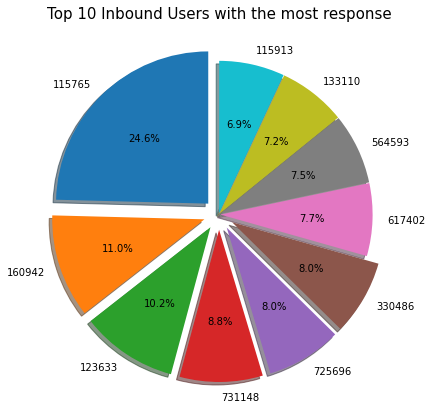

In [30]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.pie(ircdf_10['response_count'], labels = ircdf_10['author_id'],startangle=90, autopct='%1.1f%%',shadow=True,explode=(0.1, 0.1, 0.1, 0.1,0.1,0.1,0.01,0.01,0.01,0.01,))
ax.set_title("Top 10 Inbound Users with the most response", fontsize = 15)

plt.show()

In [31]:
#tweets by dates
date = df['created_at']
date
#how to take out the time in the middle

0          Tue Oct 31 22:10:47 +0000 2017
1          Tue Oct 31 22:11:45 +0000 2017
2          Tue Oct 31 22:08:27 +0000 2017
3          Tue Oct 31 21:54:49 +0000 2017
4          Tue Oct 31 21:49:35 +0000 2017
                        ...              
2811769    Wed Nov 22 08:43:51 +0000 2017
2811770    Wed Nov 22 08:35:16 +0000 2017
2811771    Thu Nov 23 04:13:07 +0000 2017
2811772    Wed Nov 22 08:31:24 +0000 2017
2811773    Tue Nov 21 22:01:04 +0000 2017
Name: created_at, Length: 2811774, dtype: object

In [32]:
#create a new dataframe to sort usernames and dates
ddf = pd.DataFrame({'author_id': df['author_id'],
     'dates': df['created_at'],
    })
ddf[:10]

,author_id,dates
0,sprintcare,Tue Oct 31 22:10:47 +0000 2017
1,115712,Tue Oct 31 22:11:45 +0000 2017
2,115712,Tue Oct 31 22:08:27 +0000 2017
3,sprintcare,Tue Oct 31 21:54:49 +0000 2017
4,115712,Tue Oct 31 21:49:35 +0000 2017
5,sprintcare,Tue Oct 31 21:46:24 +0000 2017
6,115712,Tue Oct 31 21:45:10 +0000 2017
7,sprintcare,Tue Oct 31 22:10:35 +0000 2017
8,115713,Tue Oct 31 22:04:47 +0000 2017
9,sprintcare,Tue Oct 31 20:03:31 +0000 2017


In [33]:
#Extract the first 3 letters
ddf['weekdays'] = ddf['dates'].str[:3]
ddf[:10]

,author_id,dates,weekdays
0,sprintcare,Tue Oct 31 22:10:47 +0000 2017,Tue
1,115712,Tue Oct 31 22:11:45 +0000 2017,Tue
2,115712,Tue Oct 31 22:08:27 +0000 2017,Tue
3,sprintcare,Tue Oct 31 21:54:49 +0000 2017,Tue
4,115712,Tue Oct 31 21:49:35 +0000 2017,Tue
5,sprintcare,Tue Oct 31 21:46:24 +0000 2017,Tue
6,115712,Tue Oct 31 21:45:10 +0000 2017,Tue
7,sprintcare,Tue Oct 31 22:10:35 +0000 2017,Tue
8,115713,Tue Oct 31 22:04:47 +0000 2017,Tue
9,sprintcare,Tue Oct 31 20:03:31 +0000 2017,Tue


In [34]:
wkdays = ddf['weekdays'].value_counts()
wkdays

Fri    453028
Wed    445838
Thu    440361
Tue    423052
Mon    387847
Sat    332606
Sun    329042
Name: weekdays, dtype: int64

In [35]:
wkdf = pd.DataFrame({'counts':ddf['weekdays'].value_counts()
    })
wkdf

,counts
Fri,453028
Wed,445838
Thu,440361
Tue,423052
Mon,387847
Sat,332606
Sun,329042


In [36]:
wkdf = wkdf.reindex(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
wkdf

,counts
Sun,329042
Mon,387847
Tue,423052
Wed,445838
Thu,440361
Fri,453028
Sat,332606


In [37]:
wkdf = wkdf.reset_index(level=0)
wkdf

,index,counts
0,Sun,329042
1,Mon,387847
2,Tue,423052
3,Wed,445838
4,Thu,440361
5,Fri,453028
6,Sat,332606


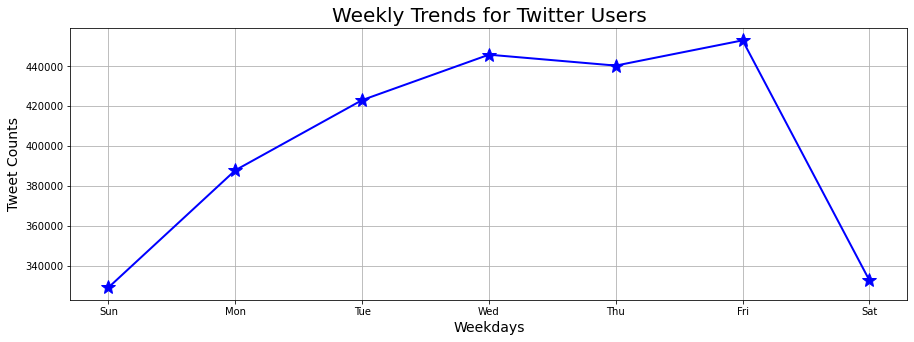

In [38]:
fig = plt.figure(figsize = (15, 5))

plt.plot(wkdf['index'], wkdf['counts'], color='blue', marker='*',linewidth=2, markersize=15)
plt.title('Weekly Trends for Twitter Users', fontsize=20)
plt.xlabel('Weekdays', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.show()

In [39]:
#weekly trend for inbound users
#create a new dataframe to sort usernames and dates
iddf = pd.DataFrame({'author_id': ndf['author_id'],
     'dates': ndf['created_at'],
    })
#Extract the first 3 letters
iddf['weekdays'] = iddf['dates'].str[:3]
iwkdays = iddf['weekdays'].value_counts()
iwkdf = pd.DataFrame({'counts':iddf['weekdays'].value_counts()
    })
iwkdf = iwkdf.reindex(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
iwkdf = iwkdf.reset_index(level=0)


In [40]:
#weekly trend for inbound users
#create a new dataframe to sort usernames and dates
oddf = pd.DataFrame({'author_id': odf['author_id'],
     'dates': odf['created_at'],
    })
#Extract the first 3 letters
oddf['weekdays'] = oddf['dates'].str[:3]
owkdays = oddf['weekdays'].value_counts()
owkdf = pd.DataFrame({'counts':oddf['weekdays'].value_counts()
    })
owkdf = owkdf.reindex(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
owkdf = owkdf.reset_index(level=0)


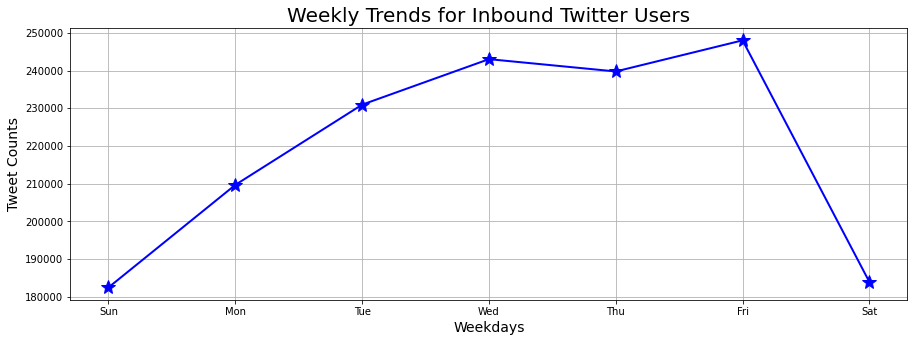

In [41]:
fig = plt.figure(figsize = (15, 5))

plt.plot(iwkdf['index'], iwkdf['counts'], color='blue', marker='*',linewidth=2, markersize=15)
plt.title('Weekly Trends for Inbound Twitter Users', fontsize=20)
plt.xlabel('Weekdays', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.show()

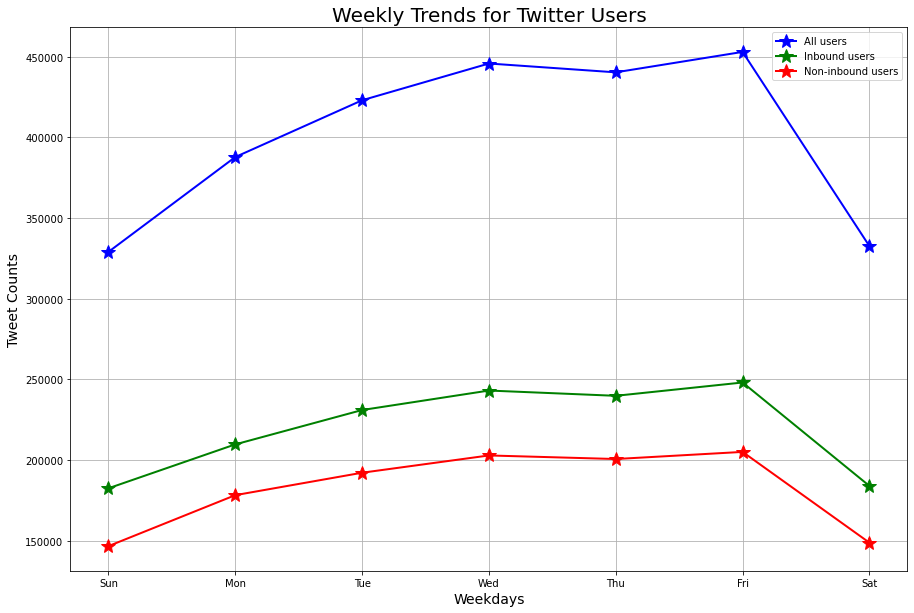

In [42]:
fig = plt.figure(figsize = (15, 10))

plt.plot(wkdf['index'], wkdf['counts'], color='blue', marker='*',linewidth=2, markersize=15,label='All users')
plt.plot(iwkdf['index'], iwkdf['counts'], color='green', marker='*',linewidth=2, markersize=15,label='Inbound users')
plt.plot(owkdf['index'], owkdf['counts'], color='red', marker='*',linewidth=2, markersize=15,label='Non-inbound users')

plt.title('Weekly Trends for Twitter Users', fontsize=20)
plt.xlabel('Weekdays', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()

plt.show()#authors on friday

In [43]:
# fig = plt.figure(figsize = (20, 20))
# lines = wkdf.plot.line(style='*-',markerfacecolor='red')

In [44]:
#build a df only for the text
tdf = df[['text']]
print('shape is:', tdf.shape)
tdf.head()

shape is: (2811774, 1)


,text
0,@115712 I understand. I would like to assist y...
1,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...
3,@115712 Please send us a Private Message so th...
4,@sprintcare I did.


In [45]:
tdf['text_lower'] = tdf.loc[:,'text'].str.lower()
tdf.head(10)

<ipython-input-45-4f66bb99cc17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['text_lower'] = tdf.loc[:,'text'].str.lower()


,text,text_lower
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...
4,@sprintcare I did.,@sprintcare i did.
5,@115712 Can you please send us a private messa...,@115712 can you please send us a private messa...
6,@sprintcare is the worst customer service,@sprintcare is the worst customer service
7,@115713 This is saddening to hear. Please shoo...,@115713 this is saddening to hear. please shoo...
8,@sprintcare You gonna magically change your co...,@sprintcare you gonna magically change your co...
9,@115713 We understand your concerns and we'd l...,@115713 we understand your concerns and we'd l...


In [46]:
punctuations = string.punctuation
print(punctuations)

%timeit 

def remove_punctuations(text):
    return text.translate(str.maketrans('','',punctuations))#method to remove puntuations
    

tdf['text_wo_punct'] = tdf['text_lower'].apply(lambda text: remove_punctuations(text))
tdf.head(10)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


<ipython-input-46-d08be17b4b5e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['text_wo_punct'] = tdf['text_lower'].apply(lambda text: remove_punctuations(text))


,text,text_lower,text_wo_punct
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...,115712 please send us a private message so tha...
4,@sprintcare I did.,@sprintcare i did.,sprintcare i did
5,@115712 Can you please send us a private messa...,@115712 can you please send us a private messa...,115712 can you please send us a private messag...
6,@sprintcare is the worst customer service,@sprintcare is the worst customer service,sprintcare is the worst customer service
7,@115713 This is saddening to hear. Please shoo...,@115713 this is saddening to hear. please shoo...,115713 this is saddening to hear please shoot ...
8,@sprintcare You gonna magically change your co...,@sprintcare you gonna magically change your co...,sprintcare you gonna magically change your con...
9,@115713 We understand your concerns and we'd l...,@115713 we understand your concerns and we'd l...,115713 we understand your concerns and wed lik...


In [47]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()
#what is this

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [48]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zhaor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
from nltk.corpus import stopwords
', '.join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [50]:
stopwords_set = set(stopwords.words('english'))
def remove_stopwords(text):
    return ' '.join(words for words in str(text).split() if words not in stopwords_set)
    

tdf['text_wo_stop'] = tdf['text_wo_punct'].apply(lambda text: remove_stopwords(text))
tdf.head()

<ipython-input-50-07b3aaadbd38>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['text_wo_stop'] = tdf['text_wo_punct'].apply(lambda text: remove_stopwords(text))


,text,text_lower,text_wo_punct,text_wo_stop
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...,115712 understand would like assist would need...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...,sprintcare sent several private messages one r...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...,115712 please send us a private message so tha...,115712 please send us private message assist c...
4,@sprintcare I did.,@sprintcare i did.,sprintcare i did,sprintcare


In [51]:
from collections import Counter
cnt = Counter()

for text in tdf['text_wo_stop'].values:
    for word in text.split():
        cnt[word] +=1
        
cnt.most_common(10)

[('us', 451262),
 ('please', 402709),
 ('dm', 335374),
 ('help', 267633),
 ('hi', 224603),
 ('thanks', 206452),
 ('get', 200374),
 ('sorry', 192246),
 ('like', 146385),
 ('know', 145407)]

In [52]:
freq_words = set([w for (w,wc) in cnt.most_common(10)])

def remove_freqwords(text):
    return ' '.join(word for word in str(text).split() if word not in freq_words)

tdf['text_wo_freq'] = tdf['text_wo_stop'].apply(lambda text:remove_freqwords(text))
tdf.head()

<ipython-input-52-3e5560684ded>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['text_wo_freq'] = tdf['text_wo_stop'].apply(lambda text:remove_freqwords(text))


,text,text_lower,text_wo_punct,text_wo_stop,text_wo_freq
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...,115712 understand would like assist would need...,115712 understand would assist would need priv...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose,sprintcare propose
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...,115712 please send us a private message so tha...,115712 please send us private message assist c...,115712 send private message assist click ‘mess...
4,@sprintcare I did.,@sprintcare i did.,sprintcare i did,sprintcare,sprintcare


In [53]:
n_rare_words = 10
rare_words = set([w for (w,c) in cnt.most_common()][:- n_rare_words: -1])
print(rare_words)

def remove_rarewords(text):
    return ' '.join(word for word in str(text).split() if word not in rare_words)

tdf['text_wo_freqrare'] = tdf['text_wo_freq'].apply(lambda text:remove_rarewords(text))
tdf.head()

{'823867', '823870', 'notjustxmasallyearround', 'httpstco4v1ft0th5x', '823868', 'httpstcogfyuq1kjtk', 'httpstcov2tmhetl7q', 'httpstco7uqpwyh1b6', '823869'}


<ipython-input-53-63059aa8cd05>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['text_wo_freqrare'] = tdf['text_wo_freq'].apply(lambda text:remove_rarewords(text))


,text,text_lower,text_wo_punct,text_wo_stop,text_wo_freq,text_wo_freqrare
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...,115712 understand would like assist would need...,115712 understand would assist would need priv...,115712 understand would assist would need priv...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose,sprintcare propose,sprintcare propose
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...,115712 please send us a private message so tha...,115712 please send us private message assist c...,115712 send private message assist click ‘mess...,115712 send private message assist click ‘mess...
4,@sprintcare I did.,@sprintcare i did.,sprintcare i did,sprintcare,sprintcare,sprintcare


Data wrangling

In [54]:
first_inbound = df[pd.isnull(df.in_response_to_tweet_id) & df.inbound]

QnR = pd.merge(first_inbound, df, left_on='tweet_id', 
                                  right_on='in_response_to_tweet_id')

# Filter to only outbound replies (from companies)
QnR = QnR[QnR.inbound_y ^ True]
print(f'Data shape: {QnR.shape}')
QnR.head()

Data shape: (794299, 14)


,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y
0,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
1,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,9,sprintcare,False,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...,NaN,8.0
2,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,10,sprintcare,False,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...,NaN,8.0
3,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,17,sprintcare,False,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...,16,18.0
4,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,19,sprintcare,False,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...,NaN,20.0
